In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [7]:
iris_df = pd.DataFrame(
     iris.data
    ,columns = columns
)
iris_df['TARGET'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_df['TARGET'].value_counts()

2    50
1    50
0    50
Name: TARGET, dtype: int64

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### PCA 전/후 시각화

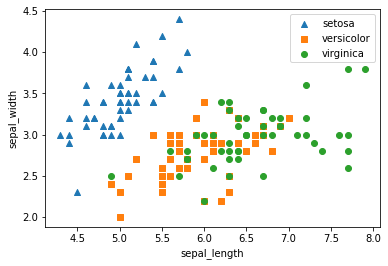

In [17]:
 markers = ['^','s','o'] #marker's shape

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['TARGET']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['TARGET']==i]['sepal_width']
    plt.scatter(
         x_axis_data
        ,y_axis_data
        ,marker = marker
        ,label = iris.target_names[i]
    )
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

In [22]:
iris_df_pca = pd.DataFrame(
     iris_pca
    ,columns = ['com1','com2']
)
iris_df_pca.head()

,com1,com2
0,-2.576120,0.474499
1,-2.415322,-0.678092
2,-2.659333,-0.348282
3,-2.601991,-0.603306
4,-2.683744,0.640220


In [23]:
iris_df_pca['TARGET'] = iris.target
iris_df_pca.head()

,com1,com2,TARGET
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0


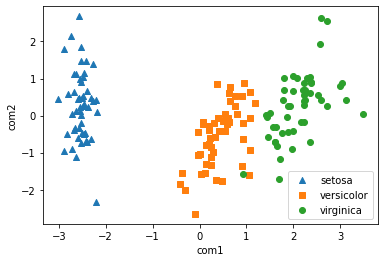

In [26]:
 markers = ['^','s','o'] #marker's shape

for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['TARGET']==i]['com1']
    y_axis_data = iris_df_pca[iris_df_pca['TARGET']==i]['com2']
    plt.scatter(
         x_axis_data
        ,y_axis_data
        ,marker = marker
        ,label = iris.target_names[i]
    )
    
plt.legend()
plt.xlabel('com1')
plt.ylabel('com2')
plt.show()